In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [32]:
# Reference to previous notebook
print("This analysis builds on the data loaded in '01_data_loading.ipynb'")
print("Analyzing healthcare spending patterns across US states for 2020")

This analysis builds on the data loaded in '01_data_loading.ipynb'
Analyzing healthcare spending patterns across US states for 2020


In [33]:
# Load and prepare data (linking from previous notebook)
df = pd.read_csv('../data/raw/kff_healthcare_spending_per_capita_2020.csv', 
                 skiprows=2,
                 thousands=',',
                 nrows=52)

# Display basic information about the dataset
print("\nDataset Overview:")
print("-----------------")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumns in dataset:")
print(df.columns.tolist())

print("\nFirst few rows of raw data:")
display(df.head())


Dataset Overview:
-----------------
Number of rows: 52
Number of columns: 2

Columns in dataset:
['Location', 'Health Spending per Capita']

First few rows of raw data:


,Location,Health Spending per Capita
0,United States,$10191
1,Alabama,$9280
2,Alaska,$13642
3,Arizona,$8756
4,Arkansas,$9338


In [34]:
# Clean the spending data
df['Health Spending per Capita'] = df['Health Spending per Capita'].str.replace('$', '').str.replace(',', '').astype(float)

print("\nFirst few rows after cleaning:")
display(df.head())


First few rows after cleaning:


,Location,Health Spending per Capita
0,United States,10191.0
1,Alabama,9280.0
2,Alaska,13642.0
3,Arizona,8756.0
4,Arkansas,9338.0


In [35]:
# Separate state data from US average
state_data = df[df['Location'] != 'United States'].copy()
us_average = df[df['Location'] == 'United States']['Health Spending per Capita'].values[0]

print("\nBasic Statistics:")
print(f"US Average Spending: ${us_average:,.2f}")
print(f"Number of States (including DC): {len(state_data)}")
print(f"Highest Spending: ${state_data['Health Spending per Capita'].max():,.2f}")
print(f"Lowest Spending: ${state_data['Health Spending per Capita'].min():,.2f}")


Basic Statistics:
US Average Spending: $10,191.00
Number of States (including DC): 51
Highest Spending: $14,381.00
Lowest Spending: $7,522.00


In [36]:
# Define regions
regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
                 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 
                'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
              'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
              'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 
             'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
}

In [37]:
# Add region to state_data
state_data['Region'] = state_data['Location'].apply(
    lambda x: next((region for region, states in regions.items() if x in states), 'Other')
)

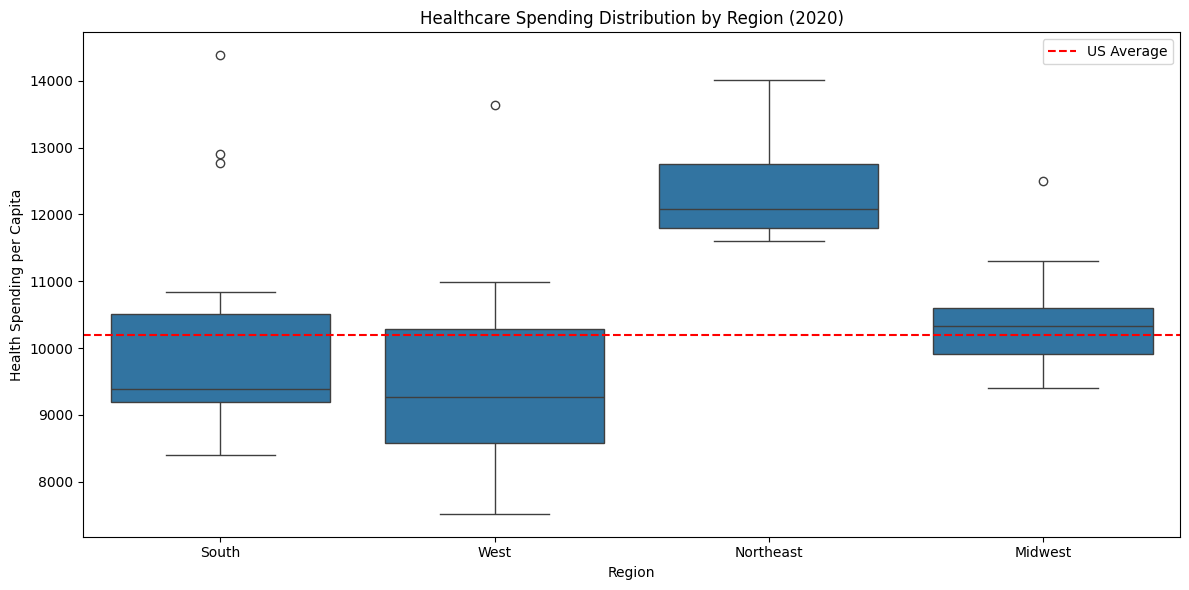

In [38]:
# 1. Regional Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Healthcare Spending Distribution by Region (2020)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
# Print the regional analysis (below) after boxplot (above)
print("\nRegional Analysis:")
print("-----------------")
for region in regions.keys():
    region_data = state_data[state_data['Region'] == region]
    print(f"\n{region} Region:")
    print(f"Average Spending: ${region_data['Health Spending per Capita'].mean():,.2f}")
    print(f"Highest: ${region_data['Health Spending per Capita'].max():,.2f} ({region_data.loc[region_data['Health Spending per Capita'].idxmax(), 'Location']})")
    print(f"Lowest: ${region_data['Health Spending per Capita'].min():,.2f} ({region_data.loc[region_data['Health Spending per Capita'].idxmin(), 'Location']})")


Regional Analysis:
-----------------

Northeast Region:
Average Spending: $12,400.67
Highest: $14,007.00 (New York)
Lowest: $11,603.00 (Pennsylvania)

Midwest Region:
Average Spending: $10,444.83
Highest: $12,495.00 (South Dakota)
Lowest: $9,408.00 (Kansas)

South Region:
Average Spending: $10,138.76
Highest: $14,381.00 (District of Columbia)
Lowest: $8,406.00 (Texas)

West Region:
Average Spending: $9,617.54
Highest: $13,642.00 (Alaska)
Lowest: $7,522.00 (Utah)


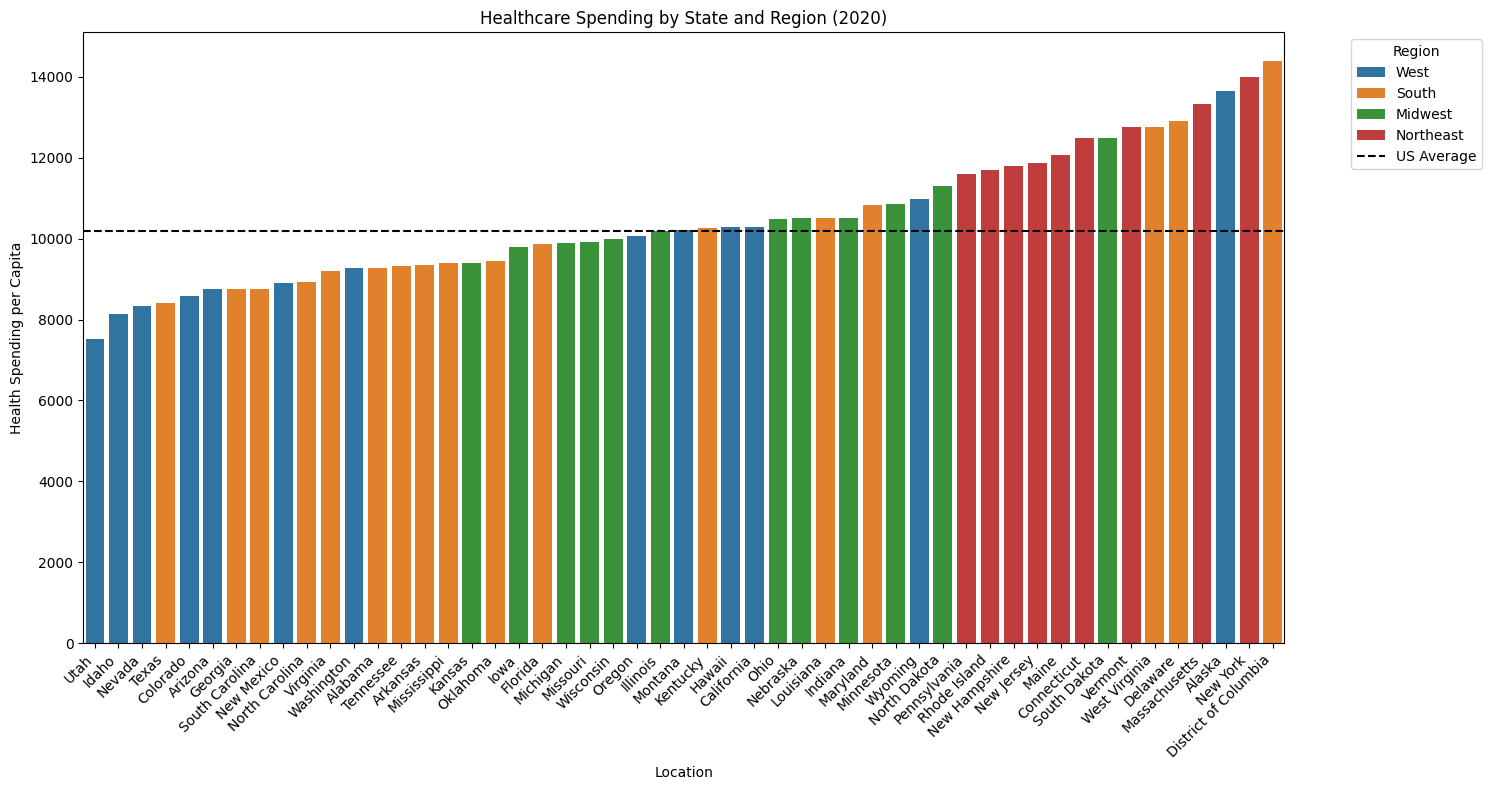

In [40]:
# 2. State Rankings Visualization
plt.figure(figsize=(15, 8))
sns.barplot(data=state_data.sort_values('Health Spending per Capita', ascending=True),
            x='Location',
            y='Health Spending per Capita',
            hue='Region',
            legend=True)
plt.axhline(y=us_average, color='black', linestyle='--', label='US Average')
plt.xticks(rotation=45, ha='right')
plt.title('Healthcare Spending by State and Region (2020)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

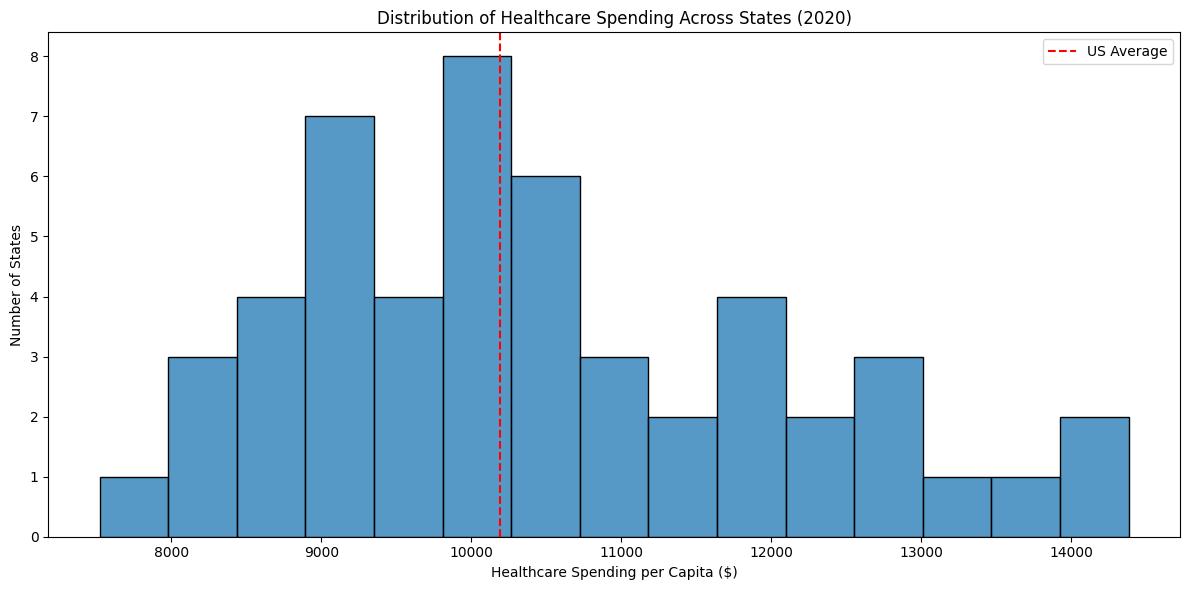

In [41]:
# 3. Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=state_data, x='Health Spending per Capita', bins=15)
plt.axvline(x=us_average, color='r', linestyle='--', label='US Average')
plt.title('Distribution of Healthcare Spending Across States (2020)')
plt.xlabel('Healthcare Spending per Capita ($)')
plt.ylabel('Number of States')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
# Calculate and display key statistics
print("\nDetailed Statistical Analysis:")
print("-----------------------------")

# Regional Statistics
regional_stats = state_data.groupby('Region').agg({
    'Health Spending per Capita': ['mean', 'std', 'count', 'min', 'max']
}).round(2)

print("\nRegional Statistics:")
display(regional_stats)


Detailed Statistical Analysis:
-----------------------------

Regional Statistics:


Health Spending per Capita                                 
                                mean      std count      min      max
Region                                                               
Midwest                     10444.83   823.91    12   9408.0  12495.0
Northeast                   12400.67   825.46     9  11603.0  14007.0
South                       10138.76  1686.19    17   8406.0  14381.0
West                         9617.54  1585.49    13   7522.0  13642.0

In [43]:
# Variance Analysis
print("\nVariance Analysis:")
print(f"Overall State Variance: ${state_data['Health Spending per Capita'].var():,.2f}")
print(f"Standard Deviation: ${state_data['Health Spending per Capita'].std():,.2f}")
print(f"Coefficient of Variation: {(state_data['Health Spending per Capita'].std() / state_data['Health Spending per Capita'].mean() * 100):.1f}%")


Variance Analysis:
Overall State Variance: $2,668,798.23
Standard Deviation: $1,633.65
Coefficient of Variation: 15.6%


In [44]:
# Top and Bottom States Analysis
print("\nTop 5 States by Healthcare Spending:")
display(state_data.nlargest(5, 'Health Spending per Capita')[['Location', 'Region', 'Health Spending per Capita']])

print("\nBottom 5 States by Healthcare Spending:")
display(state_data.nsmallest(5, 'Health Spending per Capita')[['Location', 'Region', 'Health Spending per Capita']])


Top 5 States by Healthcare Spending:


,Location,Region,Health Spending per Capita
9,District of Columbia,South,14381.0
33,New York,Northeast,14007.0
2,Alaska,West,13642.0
22,Massachusetts,Northeast,13319.0
8,Delaware,South,12899.0



Bottom 5 States by Healthcare Spending:


,Location,Region,Health Spending per Capita
45,Utah,West,7522.0
13,Idaho,West,8148.0
29,Nevada,West,8348.0
44,Texas,South,8406.0
6,Colorado,West,8583.0


In [45]:
# Distance from National Average
state_data['Difference_from_US_Avg'] = state_data['Health Spending per Capita'] - us_average
state_data['Percent_Difference'] = (state_data['Difference_from_US_Avg'] / us_average * 100).round(1)

print("\nStates Relative to US Average:")
print(f"States Above Average: {sum(state_data['Health Spending per Capita'] > us_average)}")
print(f"States Below Average: {sum(state_data['Health Spending per Capita'] < us_average)}")

print("\nMost Extreme Differences from US Average:")
print("\nHighest above average:")
display(state_data.nlargest(3, 'Percent_Difference')[['Location', 'Region', 'Percent_Difference']])

print("\nLowest below average:")
display(state_data.nsmallest(3, 'Percent_Difference')[['Location', 'Region', 'Percent_Difference']])


States Relative to US Average:
States Above Average: 26
States Below Average: 25

Most Extreme Differences from US Average:

Highest above average:


,Location,Region,Percent_Difference
9,District of Columbia,South,41.1
33,New York,Northeast,37.4
2,Alaska,West,33.9



Lowest below average:


,Location,Region,Percent_Difference
45,Utah,West,-26.2
13,Idaho,West,-20.0
29,Nevada,West,-18.1
